In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time

%matplotlib inline

pd.options.display.max_rows = 10

In [28]:
# read data from csv file
# drop the patien id column

patient_data =  pd.read_csv('../data/breast-cancer-wisconsin.csv')

patient_data = patient_data.drop('id', axis=1)

patient_data = patient_data[~patient_data["Bare Nuclei"].str.contains('\?')]

patient_data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [29]:
# class value: 2 is benign, 4 is malignant, change to: 0 is benign (no cancer), 1 is malignant (cancer)

# change class 2 -> 0, benign, no cancer
mask = patient_data.Class == 2
column_name = 'Class'
patient_data.loc[mask, column_name] = 0

# change class 4 -> 1, malignant, cancer
mask = patient_data.Class == 4
column_name = 'Class'
patient_data.loc[mask, column_name] = 1

# change dtype column ['Bare Nuclei'] from string to numeric
patient_data['Bare Nuclei'] = pd.to_numeric(patient_data['Bare Nuclei'])

# print data frame
patient_data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [30]:
def distance(point1, point2):
    """Return Euclidien distance between point1 and point2,
    each point is an array of coordinates"""
    
    return np.sqrt(np.sum((point1 - point2)**2))

def row_distance(row1, row2):
    """Return the distance between two numerical rows of a table"""
    return distance(np.array(row1), np.array(row2))

In [31]:
attributes = patient_data.drop('Class', axis = 1)
attributes.head(3)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1


In [33]:
row_distance(attributes.take([0]), attributes.take([1]))

11.874342087037917

In [45]:
def all_distances(training, new_point):
    """Returns an array of distances
    between each point in the training set
    and the new point (which is a row of attributes)"""
    attributes = training.drop('Class', axis=1)
    #new_point = np.delete(new_point, -1)
    
    all_distance = []
    for row in attributes.itertuples(index=False):
        #print(type(row))
        d = row_distance(row, new_point)
        all_distance.append(d)
        
    return all_distance

In [5]:
def table_with_distances(training, new_point):
    """Augments the training table 
    with a column of distances from new_point"""
    #training.loc[:,'Distance'] = all_distances(training, new_point)
    training['Distance'] = all_distances(training, new_point)
    return training


In [6]:
def closest(training, new_point, k):
    """Returns a data frame of the k rows 
    corresponding to the k smallest distances"""
    with_dists = table_with_distances(training, new_point)
    
    sorted_by_distance = with_dists.sort_values(by='Distance')
    
    topk = sorted_by_distance.take(np.arange(k))
    return topk

In [64]:
patient_data = patient_data.drop('Distance', axis=1)
patient_data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [54]:
new_point = patient_data.take([1]).drop('Class', axis=1)
new_point

nearest_neighbour = closest(patient_data, new_point, 5)
nearest_neighbour


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Distance
1,5,4,4,5,7,10,3,2,1,0,0.000000
179,5,3,3,3,6,10,3,1,1,1,2.828427
333,5,4,6,6,4,10,4,3,1,1,4.000000
316,5,5,5,2,5,10,4,3,1,1,4.123106
155,5,5,5,6,3,10,3,1,1,1,4.472136


In [55]:
def majority(topkclasses):
    """Return majority of neighbour labels 
    """

    # convert 'Class' column to numpy array
    topK = topkclasses.values
    
    # count number of '1' class
    ones = np.count_nonzero( topK == 1 )
    
    # count number of '0' class
    zeros = np.count_nonzero( topK == 0 )
    
    if ones > zeros:
        return 1
    else:
        return 0

In [56]:
def classify(training, new_point, k):
    closestk = closest(training, new_point, k)
    topkclasses = closestk['Class']
    return majority(topkclasses)


In [48]:
new_point = patient_data.take([3]).drop('Class', axis=1)

classify(patient_data, new_point.values, 5)

1

In [114]:
shuffled_patients = patient_data.sample(683, replace=False, random_state=123) # set seed (123) to obtain same random result
training_set = shuffled_patients.take(np.arange(478))
test_set  = shuffled_patients.take(np.arange(478, 683))

In [106]:
patient_data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [59]:
def evaluate_accuracy(training, test, k):

    test_attributes = test.drop('Class', axis = 1)
    num_correct = 0
    
    for i in np.arange(test.shape[0]):
        test_patient = test_attributes.iloc[i]
        
        if 'Distance' in training.columns:
            training = training.drop('Distance', axis=1)

        c = classify(training, test_patient, k)
        
        if c == test['Class'].iloc[i]:
            num_correct = num_correct + 1
    
    return num_correct / test.shape[0]


In [107]:
training_set
#test_set

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
684,1,1,1,1,2,1,1,1,1,0
194,3,1,1,1,2,1,3,1,1,0
116,8,3,3,1,2,2,3,2,1,0
628,2,1,1,1,2,1,1,1,1,0
271,5,1,1,1,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
685,1,1,1,1,2,1,1,1,1,0
280,3,1,1,1,2,1,3,1,1,0
613,2,3,1,1,2,1,2,1,1,0
102,4,1,2,1,2,1,3,1,1,0


In [115]:
evaluate_accuracy(training_set, test_set, 5)

/home/dmduc/installs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0.9707317073170731

In [88]:
start = time.time()
evaluate_accuracy(training_set, test_set, 3)
time.time() - start

3.963975191116333

In [70]:
test_set

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
608,5,10,10,10,10,10,10,1,1,1
81,4,1,1,2,2,1,2,1,1,0
357,8,10,10,7,10,10,7,3,8,1
210,8,10,10,10,5,10,8,10,6,1
95,1,1,1,1,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
123,5,3,5,1,8,10,5,3,1,1
267,3,3,5,2,3,10,7,1,1,1
75,1,1,2,1,2,2,4,2,1,0
575,5,1,2,1,2,1,3,1,1,0


In [72]:
training_set

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Distance
690,1,1,1,3,2,1,1,1,1,0,21.283797
272,3,3,5,2,3,10,7,1,1,1,14.142136
637,4,2,4,3,2,2,2,1,1,0,18.493242
203,5,1,1,1,2,1,3,1,1,0,20.904545
359,10,3,5,4,3,7,3,5,3,1,16.186414
...,...,...,...,...,...,...,...,...,...,...,...
566,3,1,2,1,2,1,3,1,1,0,20.591260
55,10,6,6,3,4,5,3,6,1,1,15.524175
336,6,5,5,8,4,10,3,4,1,1,12.206556
367,5,8,8,10,5,10,8,10,3,1,11.045361


### Compare with k-nn of scikit learn

In [73]:
patient_data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [132]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

wine_data = patient_data.drop('Class', axis = 1)
wine_target = patient_data['Class']

X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_target, test_size=0.3)

try_k = []

for k in np.arange(3,11):
    # Create KNN classifier
    knn = KNeighborsClassifier(k)

    # Fit the classifier to the data
    knn.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = knn.predict(X_test)
    
    # accuracy
    acc = metrics.accuracy_score(y_test, y_pred)
    
    try_k.append(acc)

In [117]:
my_k = []

for k in np.arange(3,11):
    my_acc = evaluate_accuracy(training_set, test_set, k)
    
    training_set = shuffled_patients.take(np.arange(478))
    test_set  = shuffled_patients.take(np.arange(478, 683))

    my_k.append(my_acc)

/home/dmduc/installs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [118]:
my_k

[0.975609756097561,
 0.9609756097560975,
 0.9707317073170731,
 0.9560975609756097,
 0.9560975609756097,
 0.9512195121951219,
 0.9560975609756097,
 0.9512195121951219]

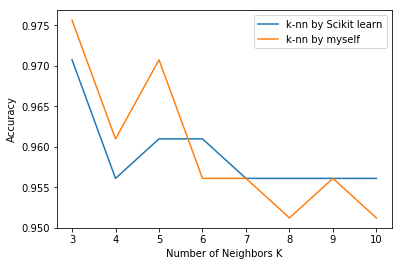

In [133]:
plt.plot(np.arange(3,11), try_k, label = "k-nn by Scikit learn")
plt.plot(np.arange(3,11), my_k, label = "k-nn by myself")

plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')

plt.legend(loc=1)
plt.show()

In [87]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
start = time.time()
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(time.time() - start)

Accuracy: 0.9804878048780488
0.0010263919830322266
